# Capstone Project: What makes people happy?

Congratulations for making it this far in the course! You absolutely rock and should be very proud of yourself! :)
In this project, you will put into practice everything you've learned in the past units and go through the whole process of data analysis.

The data you will work for this project comes from the `World Happiness Report`. The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last years, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

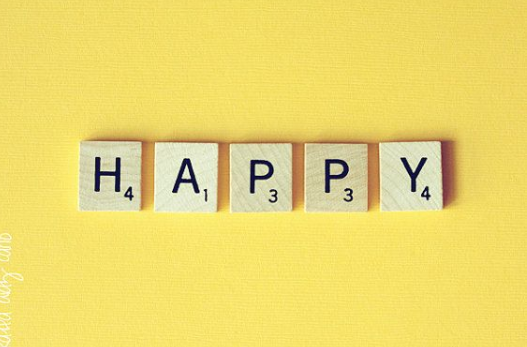

**Dataset information**
>dataset: `Dataset-Happiness_Score.csv`

The information in the datasets is based on the answers of survey participants who were asked to evaluate how satisfied they are with their current lives on a scale from 0 to 10 (the most excellent conceivable life being 10 and the most exceedingly bad conceivable life being 0).

The Happiness Score is explained by the following factors:

- `Overall rank`: Rank of a country on the happiness scale when compared to other countries
- `Country or region`
- `Score`:  National average of the responses to the main life happiness evaluation question asked in the survey. The range is [0-10]
- `GDP per capita`: Measure of the standard of living, prosperity, and overall well-being in a country; the higher, the better.
- `Healthy Life Expectancy`: The score range is [0-1]. The higher this value, the more confidence people have in terms of healthy life expectancy
- `Social support`: It indicates how much people appreciate the social support from their governments. Ranges from [0-2]; the higher this value, the more appreciation they have.
- `Freedom to make life choices`: Ranges from 0 to 1. The higher this value, the more free people feel
- `Generosity`: Ranges from 0 to 1. The higher this value, the more generous people feel
- `Perceptions of corruption`: Perception of corruption in a country; ranges from 0 to 1. The higher this value, the lower the perception of corruption 
- `year`: the year the data was collected  

**Project Objective**

Tell a story with your dataset, and to try to answer the following question:

>`Which factors are more/the most important to live a happier life?`

The results of your analysis could help people and their countries/governments to focus their resources and investments on the more significant factors to achieve a higher level of happiness.

**Project Pointers**
You are expected to:
- Conduct data cleaning (deal with duplicates, missing data, incorrect/inconsistent formatting, outliers, etc.)
- Conduct univariate analysis
- Conduct bivariate analysis
- Write out a conclusion based on your analysis that answers the project question and, ideally, makes recommendations about what actions people/countries can take.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import seaborn as sns

In [96]:
happiness_score = pd.read_csv('./datasets/Data-Happiness_Score.csv')
happiness_score

Unnamed: 0  Unnamed: 0.1  Overall rank         Country or region  Score  \
0             0             0             1                   Finland  7.632   
1             1             1             2                    Norway  7.594   
2             2             2             3                   Denmark  7.555   
3             3             3             4                   Iceland  7.495   
4             4             4             5               Switzerland  7.487   
..          ...           ...           ...                       ...    ...   
307         307           151           152                    Rwanda  3.334   
308         308           152           153                  Tanzania  3.231   
309         309           153           154               Afghanistan  3.203   
310         310           154           155  Central African Republic  3.083   
311         311           155           156               South Sudan  2.853   

     GDP per capita  Social support  Healthy life expectancy  \
0             1.305           1.592                      NaN   
1             1.456           1.582                      NaN   
2             1.351           1.590                      NaN   
3             1.343           1.644                      NaN   
4             1.420           1.549                      NaN   
..              ...             ...                      ...   
307           0.359           0.711                      NaN   
308           0.476           0.885                      NaN   
309           0.350           0.517                      NaN   
310           0.026           0.000                      NaN   
311           0.306           0.575                      NaN   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                           0.681       0.202                      0.393  2018  
1                           0.686       0.286                      0.340  2018  
2                           0.683       0.284                      0.408  2018  
3                           0.677       0.353                      0.138  2018  
4                           0.660       0.256                      0.357  2018  
..                            ...         ...                        ...   ...  
307                         0.555       0.217                      0.411  2019  
308                         0.417       0.276                      0.147  2019  
309                         0.000       0.158                      0.025  2019  
310                         0.225       0.235                      0.035  2019  
311                         0.010       0.202                      0.091  2019  

[312 rows x 12 columns]

In [97]:
happiness_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    312 non-null    int64  
 1   Unnamed: 0.1                  312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [98]:
happiness_score.shape

(312, 12)

In [99]:
happiness_score.describe()

Unnamed: 0  Unnamed: 0.1  Overall rank       Score  GDP per capita  \
count  312.000000    312.000000    312.000000  312.000000      312.000000   
mean   155.500000     77.500000     78.500000    5.391506        0.898298   
std     90.210864     45.104737     45.104737    1.114631        0.394592   
min      0.000000      0.000000      1.000000    2.853000        0.000000   
25%     77.750000     38.750000     39.750000    4.514250        0.609500   
50%    155.500000     77.500000     78.500000    5.379500        0.960000   
75%    233.250000    116.250000    117.250000    6.176000        1.219500   
max    311.000000    155.000000    156.000000    7.769000        2.096000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count      312.000000                 7.000000                    312.000000   
mean         1.211026                 0.038571                      0.423538   
std          0.300310                 0.035213                      0.156024   
min          0.000000                 0.000000                      0.000000   
25%          1.055750                 0.005000                      0.322500   
50%          1.265500                 0.048000                      0.449500   
75%          1.457500                 0.066000                      0.540250   
max          1.644000                 0.080000                      0.724000   

       Generosity  Perceptions of corruption         year  
count  312.000000                 311.000000   312.000000  
mean     0.182926                   0.111299  2018.500000  
std      0.096739                   0.095365     0.500803  
min      0.000000                   0.000000  2018.000000  
25%      0.108750                   0.050000  2018.000000  
50%      0.175500                   0.082000  2018.500000  
75%      0.245000                   0.140500  2019.000000  
max      0.598000                   0.457000  2019.000000

In [104]:
happiness_score

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
307           152                    Rwanda  3.334           0.359   
308           153                  Tanzania  3.231           0.476   
309           154               Afghanistan  3.203           0.350   
310           155  Central African Republic  3.083           0.026   
311           156               South Sudan  2.853           0.306   

     Social support  Freedom to make life choices  Generosity  \
0             1.592                         0.681       0.202   
1             1.582                         0.686       0.286   
2             1.590                         0.683       0.284   
3             1.644                         0.677       0.353   
4             1.549                         0.660       0.256   
..              ...                           ...         ...   
307           0.711                         0.555       0.217   
308           0.885                         0.417       0.276   
309           0.517                         0.000       0.158   
310           0.000                         0.225       0.235   
311           0.575                         0.010       0.202   

     Perceptions of corruption  year  
0                        0.393  2018  
1                        0.340  2018  
2                        0.408  2018  
3                        0.138  2018  
4                        0.357  2018  
..                         ...   ...  
307                      0.411  2019  
308                      0.147  2019  
309                      0.025  2019  
310                      0.035  2019  
311                      0.091  2019  

[312 rows x 9 columns]

# Cleaning Data

In [101]:
happiness_score.drop("Unnamed: 0.1", axis=1, inplace=True)
happiness_score.drop("Unnamed: 0", axis=1, inplace=True)

In [102]:
happiness_score.drop('Healthy life expectancy', axis=1, inplace=True)

In [103]:
happiness_score

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
307           152                    Rwanda  3.334           0.359   
308           153                  Tanzania  3.231           0.476   
309           154               Afghanistan  3.203           0.350   
310           155  Central African Republic  3.083           0.026   
311           156               South Sudan  2.853           0.306   

     Social support  Freedom to make life choices  Generosity  \
0             1.592                         0.681       0.202   
1             1.582                         0.686       0.286   
2             1.590                         0.683       0.284   
3             1.644                         0.677       0.353   
4             1.549                         0.660       0.256   
..              ...                           ...         ...   
307           0.711                         0.555       0.217   
308           0.885                         0.417       0.276   
309           0.517                         0.000       0.158   
310           0.000                         0.225       0.235   
311           0.575                         0.010       0.202   

     Perceptions of corruption  year  
0                        0.393  2018  
1                        0.340  2018  
2                        0.408  2018  
3                        0.138  2018  
4                        0.357  2018  
..                         ...   ...  
307                      0.411  2019  
308                      0.147  2019  
309                      0.025  2019  
310                      0.035  2019  
311                      0.091  2019  

[312 rows x 9 columns]

In [105]:
happiness_score.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
year                            0
dtype: int64

# Overview of Happiness Scores

In [65]:
fig = px.scatter(happiness_score, x="Country or region", y="GDP per capita", color='year',symbol="year")
        
fig.update_layout(title_text='2018 vs 2019')
fig.update_xaxes(title= 'Region',zeroline= False)
fig.update_yaxes(title= 'GDP',zeroline= False)

fig.update_layout(coloraxis_showscale=False)

fig.show()

# Exploratory Data Analysis

In [66]:
# 2018
happiness_score_2018 = happiness_score.loc[happiness_score.year == 2018]
happiness_score_2018

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Freedom to make life choices  Generosity  \
0             1.592                         0.681       0.202   
1             1.582                         0.686       0.286   
2             1.590                         0.683       0.284   
3             1.644                         0.677       0.353   
4             1.549                         0.660       0.256   
..              ...                           ...         ...   
151           1.073                         0.244       0.083   
152           0.991                         0.481       0.270   
153           0.608                         0.112       0.224   
154           0.000                         0.305       0.218   
155           0.627                         0.065       0.149   

     Perceptions of corruption  year  
0                        0.393  2018  
1                        0.340  2018  
2                        0.408  2018  
3                        0.138  2018  
4                        0.357  2018  
..                         ...   ...  
151                      0.064  2018  
152                      0.097  2018  
153                      0.106  2018  
154                      0.038  2018  
155                      0.076  2018  

[156 rows x 9 columns]

In [121]:
# Top 10 happiness countries
happiness_score_2018_top10 = happiness_score_2018.head(10)
happiness_score_2018_top10

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   
5             6       Netherlands  7.441           1.361           1.488   
6             7            Canada  7.328           1.330           1.532   
7             8       New Zealand  7.324           1.268           1.601   
8             9            Sweden  7.314           1.355           1.501   
9            10         Australia  7.272           1.340           1.573   

   Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                         0.681       0.202                      0.393  2018  
1                         0.686       0.286                      0.340  2018  
2                         0.683       0.284                      0.408  2018  
3                         0.677       0.353                      0.138  2018  
4                         0.660       0.256                      0.357  2018  
5                         0.638       0.333                      0.295  2018  
6                         0.653       0.321                      0.291  2018  
7                         0.669       0.365                      0.389  2018  
8                         0.659       0.285                      0.383  2018  
9                         0.647       0.361                      0.302  2018

Text(0.5, 1.0, 'Top 10 Happiness Countries')

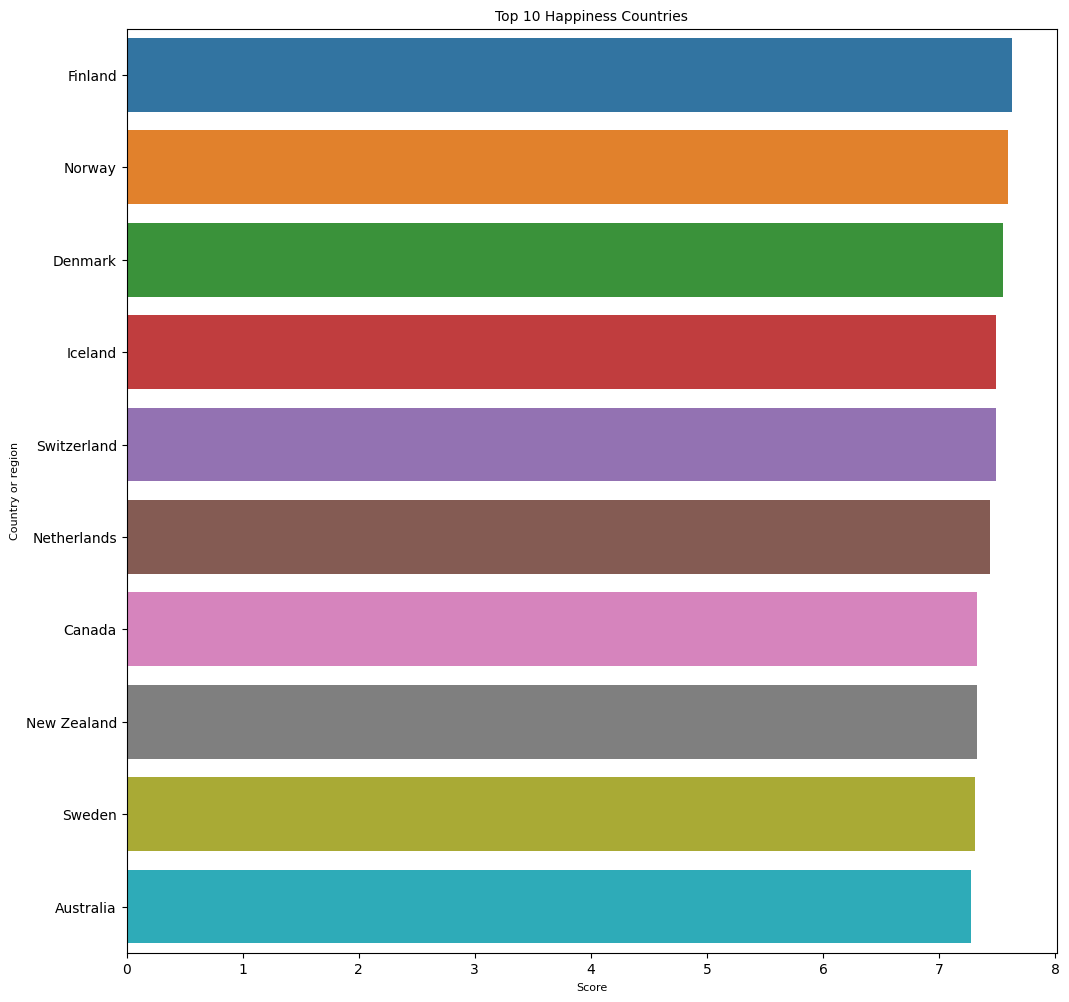

In [125]:
top = happiness_score_2018_top10.sort_values(['Score'],ascending = 0)[:10]
ax = sns.barplot(x = 'Score' , y = 'Country or region' , data = top)
ax.set_xlabel('Score', size = 8)
ax.set_ylabel('Country or region', size = 8)
ax.set_title("Top 10 Happiness Countries", size = 10)

In [107]:
# Top 10 unhappiness countries
happiness_score_2018_least10 = happiness_score_2018.tail(10)
happiness_score_2018_least10

Overall rank         Country or region  Score  GDP per capita  \
146           147                    Malawi  3.587           0.186   
147           148                     Haiti  3.582           0.315   
148           149                   Liberia  3.495           0.076   
149           150                     Syria  3.462           0.689   
150           151                    Rwanda  3.408           0.332   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Freedom to make life choices  Generosity  \
146           0.541                         0.531       0.210   
147           0.714                         0.025       0.392   
148           0.858                         0.419       0.206   
149           0.382                         0.088       0.376   
150           0.896                         0.636       0.200   
151           1.073                         0.244       0.083   
152           0.991                         0.481       0.270   
153           0.608                         0.112       0.224   
154           0.000                         0.305       0.218   
155           0.627                         0.065       0.149   

     Perceptions of corruption  year  
146                      0.080  2018  
147                      0.104  2018  
148                      0.030  2018  
149                      0.144  2018  
150                      0.444  2018  
151                      0.064  2018  
152                      0.097  2018  
153                      0.106  2018  
154                      0.038  2018  
155                      0.076  2018

In [108]:
# Data visulisartion for top 10 happiness countries
colors_2018_top10 = ['DarkCyan', 'Chartreuse', 'OrangeRed','DarkRed','LightGoldenRodYellow']

In [109]:
fig = px.bar(happiness_score_2018_top10, x = 'Country or region', 
                 y = ['GDP per capita','Social support', 'Freedom to make life choices', 'Generosity','Perceptions of corruption'], 
                 color_discrete_sequence = colors_2018_least10)

fig.update_layout(title_text='Factors of Top 10 countries in 2018')
fig.update_yaxes(title= 'World Rank')
fig.update_xaxes(title= 'Countries')

fig.update_layout
fig.show()

In [110]:
# Data visulisartion for top 10 unhappiness countries
colors_2018_least10 = ['DarkCyan', 'Chartreuse', 'OrangeRed','DarkRed','LightGoldenRodYellow']

In [111]:
fig = px.bar(happiness_score_2018_least10, x = 'Country or region', 
                 y = ['GDP per capita','Social support', 'Freedom to make life choices', 'Generosity','Perceptions of corruption'], 
                 color_discrete_sequence = colors_2018_least10)

fig.update_layout(title_text='Factors of Least Happiness Countries in 2018')
fig.update_yaxes(title= 'World Rank')
fig.update_xaxes(title= 'Countries')

fig.update_layout
fig.show()

In [112]:
# Relationships between factors
corr_2018 = happiness_score_2018.corr()
corr_2018

Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.991749       -0.805897   
Score                            -0.991749  1.000000        0.802124   
GDP per capita                   -0.805897  0.802124        1.000000   
Social support                   -0.737500  0.745760        0.672080   
Freedom to make life choices     -0.530786  0.544280        0.332275   
Generosity                       -0.103602  0.135825       -0.011241   
Perceptions of corruption        -0.371133  0.405292        0.319582   
year                                   NaN       NaN             NaN   

                              Social support  Freedom to make life choices  \
Overall rank                       -0.737500                     -0.530786   
Score                               0.745760                      0.544280   
GDP per capita                      0.672080                      0.332275   
Social support                      1.000000                      0.411087   
Freedom to make life choices        0.411087                      1.000000   
Generosity                          0.018226                      0.297988   
Perceptions of corruption           0.218364                      0.462446   
year                                     NaN                           NaN   

                              Generosity  Perceptions of corruption  year  
Overall rank                   -0.103602                  -0.371133   NaN  
Score                           0.135825                   0.405292   NaN  
GDP per capita                 -0.011241                   0.319582   NaN  
Social support                  0.018226                   0.218364   NaN  
Freedom to make life choices    0.297988                   0.462446   NaN  
Generosity                      1.000000                   0.362249   NaN  
Perceptions of corruption       0.362249                   1.000000   NaN  
year                                 NaN                        NaN   NaN

In [113]:
original=happiness_score_2018.copy()
def highlight_min(s):    
    is_min = s == s.min()
    return ['background-color: limegreen' if v else '' for v in is_min]
 
corr_2018.style.apply(highlight_min, subset=['Score','GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'])

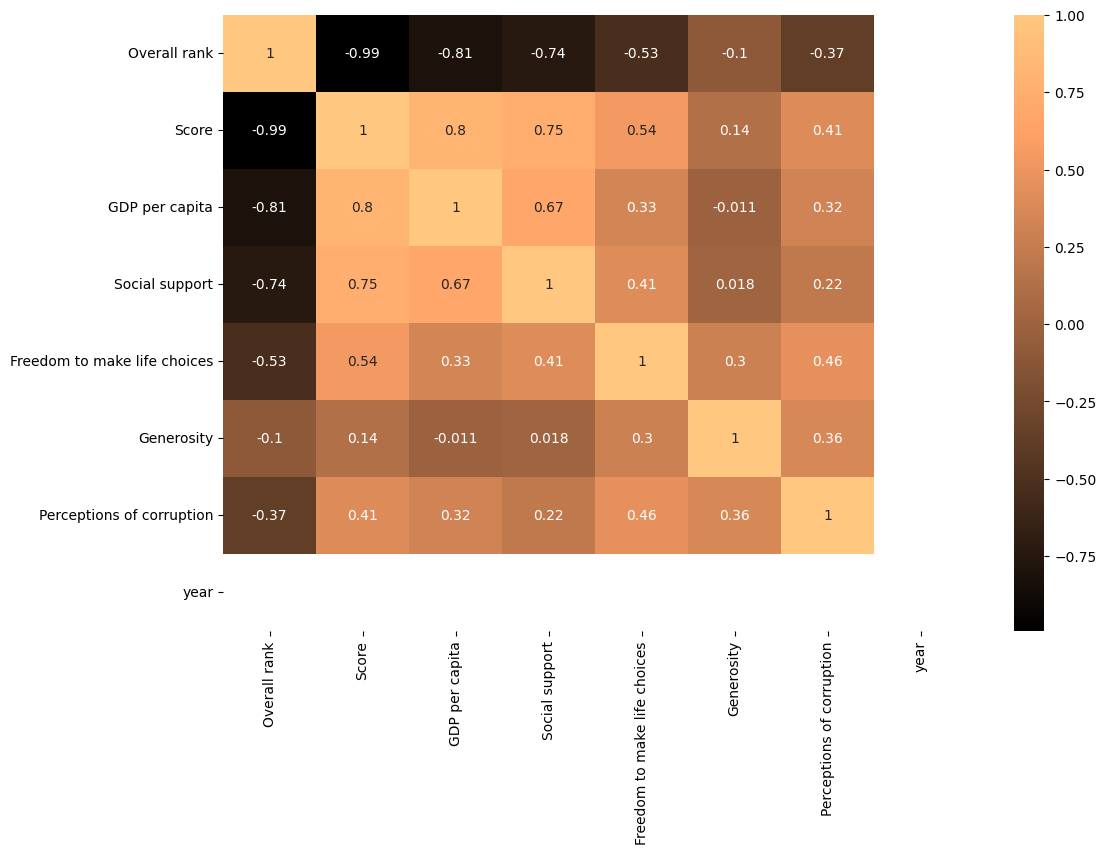

In [115]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(happiness_score_2018.corr(), cmap = 'copper', annot = True)

plt.show()

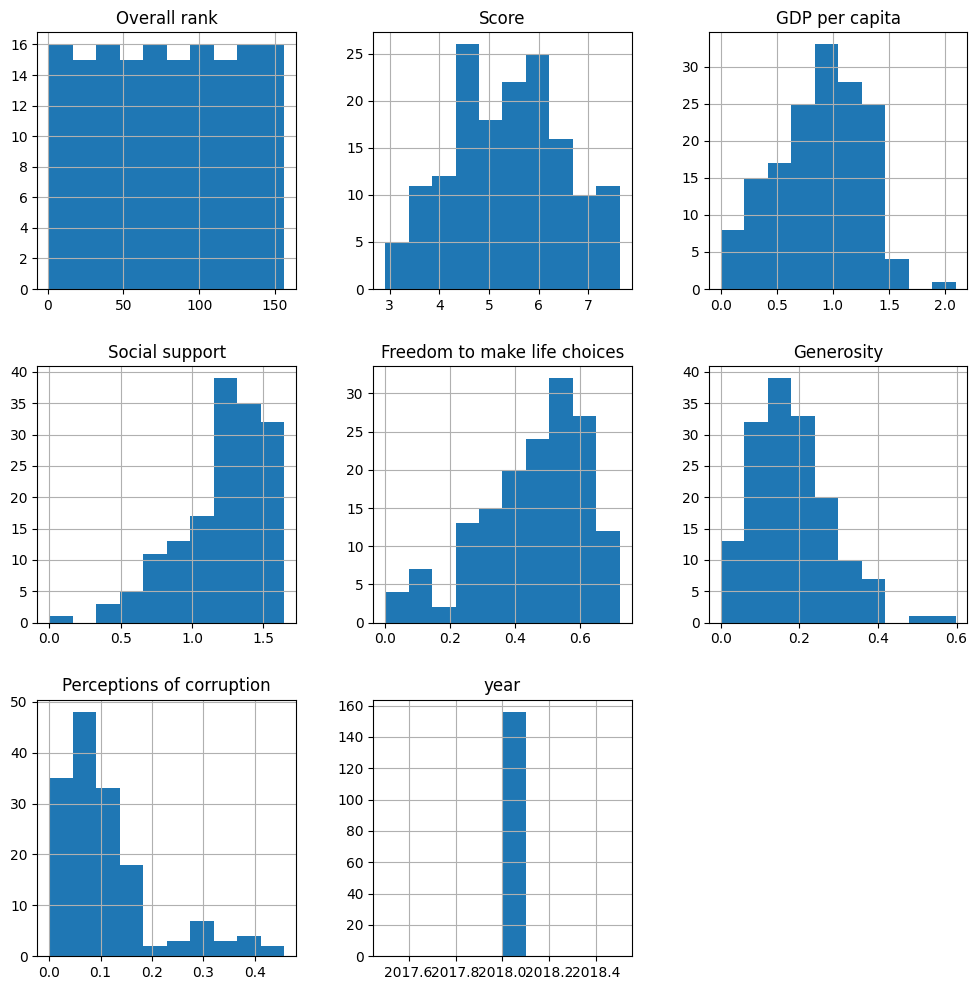

In [126]:
plt.rcParams['figure.figsize'] = (12, 12)
happiness_score_2018.hist();

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Country or region'>

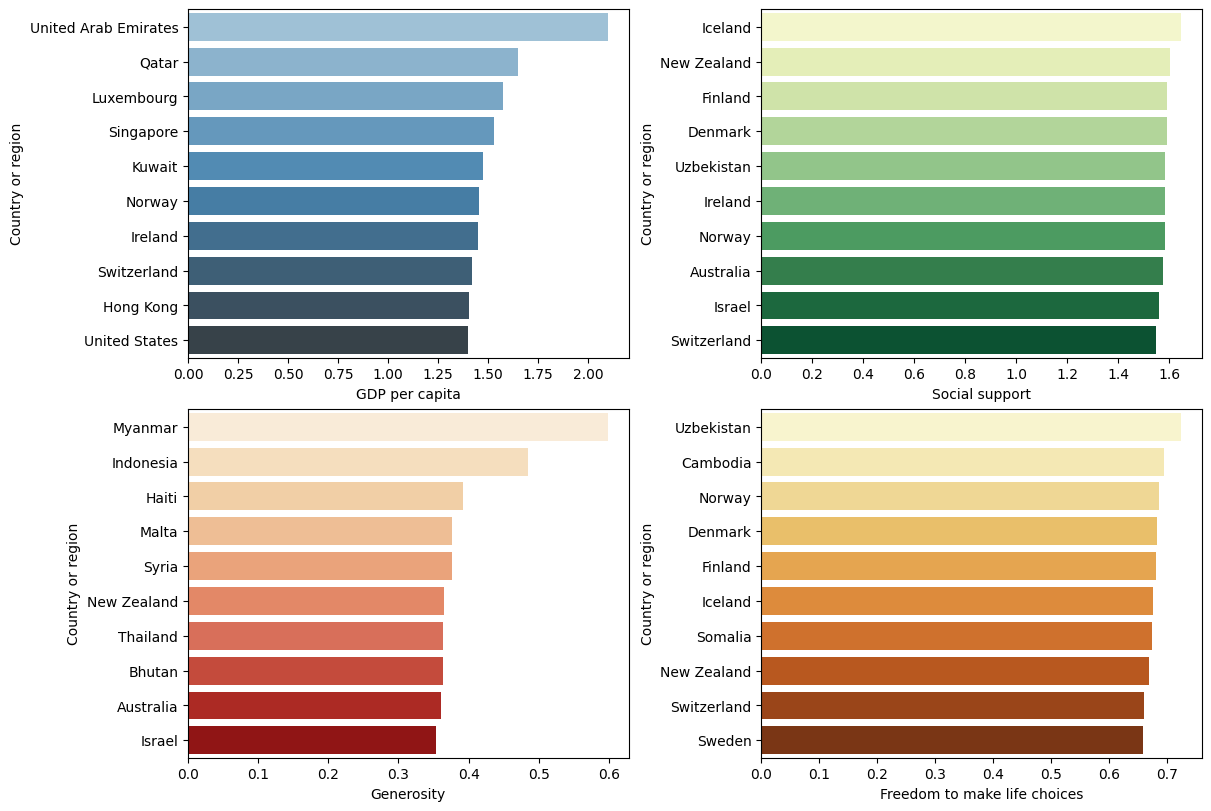

In [127]:
ig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=happiness_score_2018.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=happiness_score_2018.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Generosity' ,y='Country or region',data=happiness_score_2018.nlargest(10,'Generosity'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=happiness_score_2018.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

# Findings

I. Very negative correlations:

1. Generosisty >< GDP per capita --> (-0.001)
2. Generosisty >< Social support --> (0.018)
3. Generosity >< Score--> (0.14)

II. Medium/Low negative correlations:

1. Perception of corruption >< Social support --> (0.21)
2. Generosity >< Freedom to make life choice --> (0.29)
3. Perception of corruption >< GDP per capita --> (0.32)

III. Positive correlation

1. GDP per capita & social support 0.67
2. Score & social support 0.75
3. Score & GDP per capita 0.8

IV. 

1. Number of frequencies in 'Social suport' and 'Freedom to make life choices' are high. 
2. GDP & Score are normal distribution 
3. Most of the countries scored high in Generosity and Perceptions of corruprtion

# Observations

To compare 3 factors: Social support, freedom to make life choices and perceptions of corruptions.
The higher score in perceptioon of corruptions, the lower perception of corruption in that country. 

Denmark, Finland, Sweden, Switzerland, Norway, Ireland, etc. have high score in social support and freedom to make life choices, as well as  perception of corruption. 

--> These countries which are considered as the most happiness countries have low perceptions of corruption, which means citizens are unaware of corruptions because there are less corruptions in thoes countries. 

--> Corruption affects social support and freedom to make life choices. 

# Conclusions

Based on some arguements & findings above, social support and freedom to make life choices are considered as two of the most important factor to live a hapier life. 

The second factor is (evidently) low perception of corruption, meaning the country should reduce the issue of corruption.

On the other hand, happiness is not only defined by best social support and freedom or high GDP (wealth), it is also defined by the level of generosity of the people of country towards each other. 

To sum up (sadly), most of the countries are getting unhappier each year. 
